# Encapsulation, Inheritance, Polymorphism

## Encapsulation

***Advantage***
* Convenience
* Data safety
* Easy to maintain

## Inheritance

***Concept understanding:***  
* Another class can 'possess' the resources of its parent class. This does not means the resources are doubled but the avaibility of the resource. This means, by inheritance, we can save some resources.
* The resources are not private, including attributes and methods.  

***Classification*** 
1. **Single Inheritance:**
   Single inheritance refers to a class inheriting from only one parent class. In a single inheritance model, each class has only one direct parent, simplifying the relationship between classes and making the inheritance chain clear, easy to understand, and maintain.

   Example (Python):
   ```python
   class Animal:
       pass

   class Dog(Animal):
       pass
   ```

2. **Multiple Inheritance:**
   Multiple inheritance refers to a class inheriting from multiple parent classes simultaneously. This allows a class to acquire attributes and methods from multiple parents, but it can also lead to complex relationships, naming conflicts, and design challenges.

   Example (Python):
   ```python
   class Animal:
       pass

   class Pet:
       pass

   class Dog(Animal, Pet):
       pass
   ```

***Object&Type***  
* Every new class is inherited from `objcet` class.
* Every class is an instance of metaclass `type` class, including `object`.

### Influence

* 资源的继承（Resource Inheritance）：
* 资源的使用（Resource Utilization）：
* 资源的覆盖（Resource Overriding）：
* 资源的累加（Resource Accumulation）：

#### Resource Inheritance

Private cannot be inherited.

In [9]:
class Animal:
    a = 1
    _b = 2
    __c = 3

    def t1(self):
        print('t1')

    def _t2(self):
        print('_t2')
    
    def __t3(self):
        print('__t3')
    
    def __init__(self) -> None:
        print('init animal')
    pass

class Dog(Animal):
    def test(self):
        print(self.a)
        print(self._b)
        # print(self.__c)

        self.t1()
        self._t2()
        # self.__t3()
    pass

d = Dog()
d.test()

init animal
1
2
t1
_t2


Only usage but not duplication

In [10]:
print(Animal.a)
Animal.a = 666
print(Animal.a)

1
666


#### Resource Utilization

##### Overriding (重申)

In [13]:
class B:
    age = 10

class A(B):
    pass

print(A.age)
A.age = 9

print(A.age)
print(A.__dict__)
print(B.age)

10
9
{'__module__': '__main__', '__doc__': None, 'age': 9}
10


##### Types of Inheritance （继承的形态）

* ***Single Inheritance:***  
    The subclass inherits from only one parent class.
    * How program search resources? From the bottom to the top
* ***Multiple Inheritance***  
  * 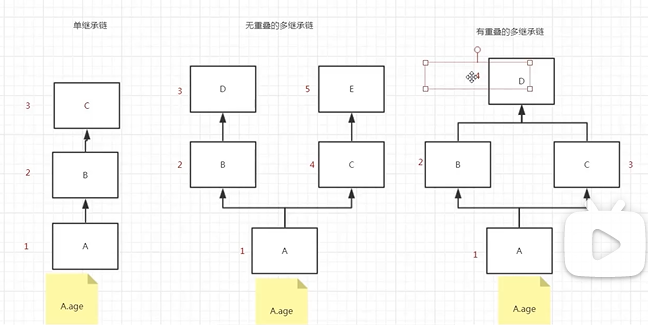
    The subclass can inherit from multiple parent classes, leading to more complex relationships.
    * With out overlapping: One branch first, than another 
    * With overlapping: At the same level, branch by branch
* Multilevel Inheritance:
    Classes are connected in a chain, allowing a class to inherit from another class, which in turn inherits from a third class, and so on.
* Interface Inheritance:
    Some languages, like Java and C#, support interface inheritance, where a class can implement multiple interfaces, achieving a form of multiple inheritance.
* Mixin Inheritance:
    This involves combining multiple classes' attributes and methods in a class, providing a flexible way to use different functionalities.

***Revolution***
* Before Python 2.2 
  * MRO Method Resolution Order: Depth First Principle (Left branch first)
  * Problem: In the context of overlapping multiple inheritance, it violates the principle of override availability. (在有重叠的多继承中违背重写可用原则)
* Python 2.2 
  * `Object` class was invented which means overlapping multiple inheritance is very common.
  * MRO(Optimized)
    * Classic class: Depth First Principle (From left to right)
    * New class: Depth First Principle(Retain the last repetitive element)
* Python 2.3-2.7
  * Algorithm
    * classic: Depth First Principle
    * New: C3: 
      * L(Object) = [Object]
      * L(Son(F1, F2)) = [Son] + merge(L[F1],L[F2],L[F1,F2])
  * Problem 
* After Python 3.x
  * C3


***How to find the order***

In [15]:
import inspect
B.mro()

[__main__.B, object]

##### SI 


Several points:  
Get out(either stack or queue) and check parent nodes

1. **Depth-First Search (DFS):**
   - **Idea:** Starting from the initial node, explore as deeply as possible along each branch until reaching a leaf node or a point where no deeper exploration is possible. Then backtrack to the previous branch and continue the exploration.
   - **Implementation:** Typically implemented using recursion or a stack.
   - **Characteristics:** Well-suited for solving connectivity problems, often used for tasks such as cycle detection in graphs or path finding.

2. **Breadth-First Search (BFS):**
   - **Idea:** Starting from the initial node, visit all the neighbors of the current node before moving on to their respective neighbors. This process continues layer by layer, expanding outward until the target node is found or the entire graph is traversed.
   - **Implementation:** Usually implemented using a queue.
   - **Characteristics:** Effective for solving shortest path problems, commonly used in tasks like finding the shortest path in an unweighted graph or network broadcasting.

In summary, Depth-First Search explores deeply, backtracking as needed, while Breadth-First Search explores layer by layer, expanding outward. These algorithms have different applications depending on the context in which they are used.

***Merge algorithm***


***Topu algorithm***

#### Overridding

Overridding resources by priority

In [19]:

class D(object):
    age = 'd'

class C(D):
    pass

class B(D):
    def test(self):
        print(self)
    @classmethod
    def test2(cls):
        print(cls)
    pass

class A(B,C):
    pass

print(A.mro())
print(A.age)
A.test2()
a = A()
a.test()



[<class '__main__.A'>, <class '__main__.B'>, <class '__main__.C'>, <class '__main__.D'>, <class 'object'>]
d
<class '__main__.A'>


##### Scenario 1:

Call by class name of father class
* Cons:
  * Possible repetitive call
  * Troublesome if the class name of father is changed

In [25]:
class B:
    a = 1

    def __init__(self):
        self.b = 2
        self.xxx = "123"

    def t1(self):
        print("t1")

    @classmethod
    def t2(cls):
        print(cls)
        print("t2")

    @staticmethod
    def t3():
        print("t3")


class A(B):
    c = 3
    def __init__(self):
        self.e = 'e'
        # I also want to initialize b how can I do that?
        # By super, by directly calling the method
        B.__init__(self)

    def tt1(self):
        print("tt1")

    @classmethod
    def tt2(cls):
        print(cls)
        print("tt2")

    @staticmethod
    def tt3():
        print("tt3")
    pass

# ----------------------------------------------------------------
a_obj = A()
print(A.a)

# initialize function is defined by father class
print(a_obj.b)

print(a_obj.__dict__)
# ----------------------------------------------------------------

1
2
{'e': 'e', 'b': 2, 'xxx': '123'}


* Cons 

In [1]:
class D:
    def __init__(self):
        print('d')

class C(D):
    def __init__(self):
        D.__init__(self)
        print('c')

class B(D):
    def __init__(self):
        D.__init__(self)
        print('b')

class A(B,C):
    def __init__(self):
        # It will repetitionly call D
        B.__init__(self)
        C.__init__(self)
        print('a')

D()
C()
B()
A()

d
d
c
d
b
d
b
d
c
a


##### Scenario 2: `super()`

By `super(Para1[,Para2])`:
* Super is a class that only applicable on new class
* Just follow MRO chain to call the corresponding method.
  * Whose mro chain?: Para2
  * What is the next node?: Para1
    *   instance define the route and class define the startpoint
    ```python
        def super(cls,instance):
            mro = instance.__class__.mro()
            return mro[mro.index(cls)+1]
    ```
  
  * What happens for different types of methods?(class, instancce, static)
    * By para2  

Common syntax:
* Python2.2+
  * super(type,obj) -> bound super object;
  * super(type,type2) -> bound super object;
* Python3+
  * super()

In [1]:
class B:
    a = 1

    def __init__(self):
        self.b = 2
        self.xxx = "123"

    def t1(self):
        print("t1")

    @classmethod
    def t2(cls):
        print(cls)
        print("t2")

    @staticmethod
    def t3():
        print("t3")


class A(B):
    c = 3
    def __init__(self):
        super(A,self).__init__()
        # The same to super().__init__() it defaultly put the class and the first parameter of the function to super()
        self.e = 'e'
        # I also want to initialize b how can I do that?
        # By super, by directly calling the method
        

    def tt1(self):
        print("tt1")

    @classmethod
    def tt2(cls):
        super(A, cls).t2()# The second parameter can only be A as this method cannot be called by an instance
        # print(cls)
        print("tt2")

    @staticmethod
    def tt3():
        print("tt3")
    pass

# ----------------------------------------------------------------
a_obj = A()
print(A.a)

# initialize function is defined by father class
print(a_obj.b)

print(a_obj.__dict__)
A.tt2()

1
2
{'b': 2, 'xxx': '123', 'e': 'e'}
<class '__main__.A'>
t2
tt2


In [2]:
class D:
    def __init__(self):
        print('d')

class C(D):
    def __init__(self):
        super(C,self).__init__()
        print('c')

class B(D):
    def __init__(self):
        super(B,self).__init__()
        print('b')

class A(B,C):
    def __init__(self):
        # It will repetitionly call D
        super().__init__()
        print('a')

D()
C()
B()
A()

d
d
c
d
b
d
c
b
a


## Polymorphism

Just like we have a parent class `animal`, and 2 son classes `dog` and `cat`. The animals can bark but the sound will be different. For the same method `bark` different animals should have different behaviors.  

Actually, python do not have really polymorphism. And we do not need it in python.
* In other languages, we need to check the parameters for a method in static languages like C++. If we want to send in a class. We need to specify which class. We cannot send diffenret class in static languages. But this is not a problem for python users.
  ```def bark(Cat self)``` Can only send `cat` in.

In [4]:
class Animal():
    def bark(self):
        pass

class Dog(Animal):
    def bark(self):
        print('Wof wof wof ')

class Cat(Animal):
    def bark(self):
        print('niao niao niao')
    
def bark(self):
    self.bark()

d = Dog()
c = Cat()
bark(c)

niao niao niao


## Supplementary Knowledge: Abstract class and abstract method

**Abstract Class:**
- **Definition:** An abstract class is a class that cannot be instantiated and exists at the top of an inheritance hierarchy, representing general concepts or behaviors.
- **Characteristics:** Abstract classes can include both abstract methods and concrete methods. Abstract methods in an abstract class are only declared, without any implementation.
- **Purpose:** They provide a template, specifying methods that subclasses must implement, while also allowing for the inclusion of common implementations.

**Abstract Method:**
- **Definition:** An abstract method is a method declared in an abstract class but lacks an actual implementation. It has only the method signature without a method body.
- **Characteristics:** Abstract methods must be implemented in subclasses. A class containing abstract methods must itself be declared as an abstract class.
- **Purpose:** They enforce that subclasses provide specific method implementations, ensuring that derived classes exhibit certain common behavior.

This actually cannot be implemented by python.

In [7]:
import abc

class Animal(object, metaclass = abc.ABCMeta):
    @abc.abstractmethod
    def bark(self):
        pass

class Dog(Animal):
    def bark(self):
        print('Wof wof wof ')

class Cat(Animal):
    # We must have this method define in subclasses
    # def bark(self):
    #     print('niao niao niao')
    pass
def bark(self):
    self.bark()

# a = Animal() # We cannot instantiate an abstract class
d = Dog()
c = Cat()

bark(c)

TypeError: Can't instantiate abstract class Cat with abstract method bark